#### Eleonora Bellasio (15650A)
# <span style="color:orangered">Laboratorio di Simulazione Numerica: Esercitazione 2

### <span style="color:royalblue">Esercizio 02.1
Calcolo il valore del seguente integrale utilizzando una distribuzione uniforme in $[0,1)$. Il grafico rappresent la stima di $I$ con la sua incertezza, calcolata con un grande numero di lanci $M$ in funzione del numero di blocchi $N$.
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

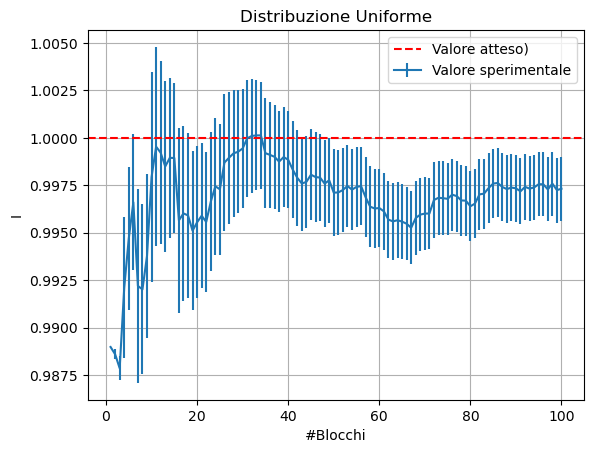

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#import math
import os,sys
import math
from scipy.optimize import curve_fit

dinp = "02.1/"
finp1 = dinp + "ese_02_1_pt1.out"
finp2 = dinp + "ese_02_1_pt2.out"

if not os.path.isfile(finp1):
    sys.exit( "file does not exist: " + finp1 )

x, y, error = np.loadtxt(finp1, usecols=(0,2,3), delimiter=' ', unpack='true')

plt.errorbar(x,y,yerr=error, label="Valore sperimentale")
plt.xlabel('#Blocchi')
plt.ylabel('I')
plt.title('Distribuzione Uniforme')
plt.grid(True)
#Confronto con il valore atteso 
plt.axhline(y=1, color='red', linestyle='--', label="Valore atteso)")
plt.legend()
plt.show()


Si fa una nuova stima dell'integrale utilizzando il metodo dell'Importance Sampling. Tale metodo consiste nell'utilizzo di una distribuzione di probabilità più simile all'integranda al fine di campionare con maggiore probabilità le zone in cui l'integranda assume valori maggiori. 

L'obiettivo è quindi quello di costruire una una distribuzione non uniforme in $[0,1]$.
Per cercare una densità di probabilità simile all'integranda, considero l'espansione in serie di Taylor della funzione $f(x) = \frac{\pi}{2}\cos(\pi x/2) dx = 1$:
$$\left.\frac{\pi}{2}\cos(\pi x/2)\right|_{x=1} \cong -\left.\left(\frac{\pi}{2}\right)^2\sin(\pi x/2)\right|_{x=1} (x-1) + \mathcal{O}(x^2) \cong - \left(\frac{\pi}{2}\right)^2 (x-1)$$
Pongo $p(x) = - \left(\frac{\pi}{2}\right)^2 (x-1)$ e trovo che la costante di normalizzazione $C$ per cui si ha che $\int_0^1 C p(x) dx = 1$ è $C=\frac{8}{\pi^2}$.
Quindi otteniamo un valore di $p(x)$ definitivo pari a:
$$p(x)=- \left(\frac{\pi}{2}\right)^2 (x-1) \frac{8}{\pi^2} = -2x+2 $$
Dato che possiamo scrivere la seguente uguaglianza
$$  I= \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = \int_0^1 f(x) d(x) = \int_0^1 g(x) p(x) d(x)$$
è facile ricavare l'espressione della nuova funzione $g(x)$:
$$g(x) = \frac{f(x)}{p(x)} = \frac{\pi}{4} \frac{\cos(\pi x/2)}{1-x}$$
Inverto la funzione cumulativa $F(x) = y$ di $p(x)$ e trovo i valori di $x$ campionando $y$ uniformemente nell'intervallo $[0,1)$:
$$ F(x) = \int_{0}^{x} p(x') dx' = -x^2+2x =:y$$
$$ x = 1 - \sqrt{(1-y)}$$

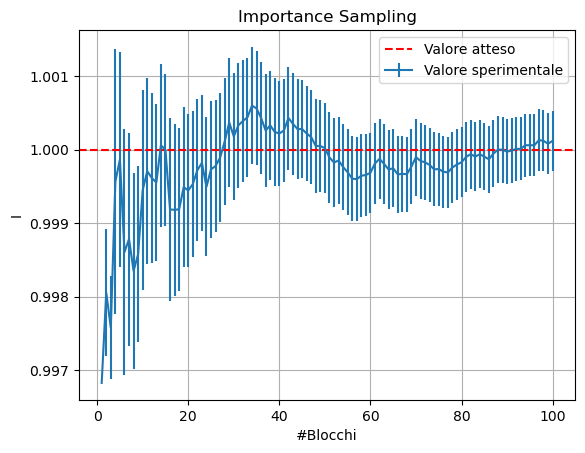

In [3]:

if not os.path.isfile(finp2):
    sys.exit( "file does not exist: " + finp2 )

x_, y_, error_ = np.loadtxt(finp2, usecols=(0,2,3), delimiter=' ', unpack='true')

plt.errorbar(x_,y_,yerr=error_, label="Valore sperimentale")
plt.xlabel('#Blocchi')
plt.ylabel('I')
plt.title('Importance Sampling')
#Confronto con il valore atteso 
plt.axhline(y=1, color='red', linestyle='--', label="Valore atteso")
plt.grid(True)
plt.legend()
plt.show()

Dal grafico sopra si nota che con il metodo dell'Importance Sampling si ottiene un risultato migliore.

Dal grafico sotto, invece, è possibile notare che l'incertezza ottenuta con il metodo dell'Importance Sampling è inferiore rispetto a quella ottenuta con l'utilizzo di una distribuzione uniforme tra $[0,1)$. Con il metodo dell'Importance Sampling le fluttuazioni statistiche sono ridotte dal fatto che si hanno più campionamenti nelle zone in cui l'integranda da più contributo al risultato.

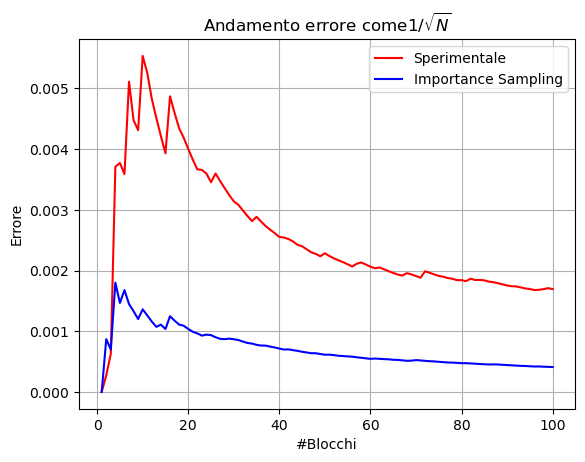

In [4]:
plt.errorbar(x, error, color='red', label="Sperimentale")
plt.errorbar(x_, error_, color='blue', label="Importance Sampling")

plt.xlabel('#Blocchi')
plt.ylabel('Errore')
plt.grid(True)
plt.title(r'Andamento errore come$1/\sqrt{N}$')
plt.legend()
plt.show()

### <span style="color:royalblue">Esercizio 02.2

Si simula un Random Walk discreto, con passo $a=1$ in una delle tre direzioni $x, y$ e $z$, e uno continuo, con passo $a$ in una direzione qualsiasi.
In entrambi i casi sono stati fatti $M=10^4$ Random Walks divisi in $N=10^2$ blocchi. Per ogni RW (lungo $N_{passi}=10^2$) e per ogni passo, si è calcolato $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$. Alla fine dei passi di ogni RW, con il metodo della media a blocchi si è determinato il valore finale di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ con la sua incertezza.

Parametro ottimizzato [k] = 1.0011
Incertezza del parametro = 0.0002


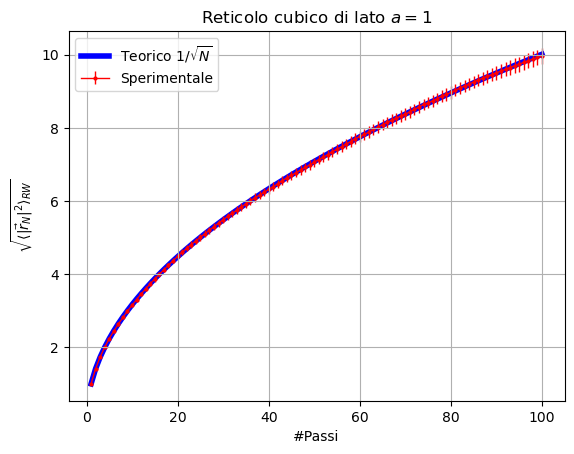

In [5]:
### <span style="color:turquoise">Esercizio 02.2
# Domanda: questo è un comportamento di tipo diffusivo????  Rispondere alla domanda sul testo, fai vedere che va come a per radice di N
# dove N è numero di passi e a coincide con k del testo. Si è un comportamento diffusivo come si può vedere dalle slide 02 a pagina 17
# dove la distanza media al quadrato è = 2Dt = Na2.

dinp = "02.2/"
finp1 = dinp + "ese_02_2_pt1.out"
finp2 = dinp + "ese_02_2_pt2.out"

if not os.path.isfile(finp1):
    sys.exit( "file does not exist: " + finp1 )

x, y, error = np.loadtxt(finp1, usecols=(0,1,2), delimiter=' ', unpack='true')

#Definisco la funzione per il fit
def f(xx, k):
    return k*np.sqrt(xx)

# Bounds specifica i limiti inferiore e superiore in cui cercare il parametro
# p_opt ottimizzano il parametro k che meglio fitta la curva
# p_cov calcola la covarianza dei parametri trovati per calcolare l'incertezza
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
p_opt, p_cov = curve_fit(f, x, y, bounds=(0,  4))

# Valuto la funzione di fit usando il parametro ottimale
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
y_fit = f(x, p_opt[0])
plt.plot(x, y_fit, color='blue',  linewidth=4, zorder=0, markersize=2, label=r'Teorico $1/ \sqrt{N}$' ) 

# Stampo il paramento ottimale e la sua incertezza
print("Parametro ottimizzato [k] = " + "{:.4f}".format(p_opt[0]))
print("Incertezza del parametro = " + "{:.4f}".format(np.sqrt(np.diagonal(p_cov)[0])))

plt.errorbar(x,y,yerr=error*5, color='red', marker='o', markersize=2, linewidth=1, zorder=1, label='Sperimentale' )
#Moltiplico l'incertezza per 5 in modo da renderla visibile nel grafico
plt.xlabel('#Passi')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
plt.grid(True)
plt.title(r'Reticolo cubico di lato $a=1$')
plt.legend()   
plt.show()

Parametro ottimizzato [k] = 0.9926
Incertezza del parametro = 0.0002


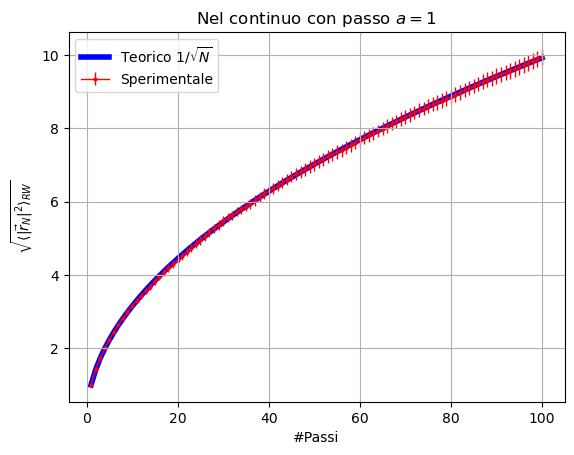

In [7]:
if not os.path.isfile(finp2):
    sys.exit( "file does not exist: " + finp2 )

x, y, error = np.loadtxt(finp2, usecols=(0,1,2), delimiter=' ', unpack='true')

# Bounds specifica i limiti inferiore e superiore in cui cercare il parametro
# p_opt ottimizzano il parametro k che meglio fitta la curva
# p_cov calcola la covarianza dei parametri trovati per calcolare l'incertezza
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
p_opt, p_cov = curve_fit(f, x, y, bounds=(0,  4))

# Valuto la funzione di fit usando il parametro ottimale
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
y_fit = f(x, p_opt[0])
plt.plot(x, y_fit, color='blue',  linewidth=4, zorder=0, markersize=2, label=r'Teorico $1/ \sqrt{N}$' ) 

# Stampo il paramento ottimale e la sua incertezza
print("Parametro ottimizzato [k] = " + "{:.4f}".format(p_opt[0]))
print("Incertezza del parametro = " + "{:.4f}".format(np.sqrt(np.diagonal(p_cov)[0])))

plt.errorbar(x,y,yerr=error*5, color='red', marker='o', markersize=2, linewidth=1, zorder=1, label='Sperimentale' )
plt.xlabel('#Passi')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
plt.grid(True)
plt.title(r'Nel continuo con passo $a=1$')
plt.legend()   
plt.show()

In entrambi i casi noto che il risultato ottenuto ha un comportamento diffusivo, infatti i dati sperimentali seguono l'andamento atteso:
$$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} \propto k \sqrt{N}$$
Dove $k=1$.
Si nota, infine, che l'errore cresce al crescere del numero di passi compiuti in ogni Random Walk. Aumentando il numero di passi diventano accessibili più traiettorie, e si ha quindi una maggiore dispersione delle distanze finali rispetto all'origine.